# Import Libraries

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 
from tensorflow.keras.models import load_model

# Load the dataset

In [3]:
def load_data(folder_path):
    images = []
    labels = []
    label_mapping = {"healthy": 0, "unhealthy": 1}

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path) and img_path.endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (224, 224))
            images.append(img)
            labels.append(label_mapping[os.path.basename(folder_path)])

    return np.array(images), np.array(labels)

healthy_folder = "dataset/healthy"
unhealthy_folder = "dataset/unhealthy"

healthy_images, healthy_labels = load_data(healthy_folder)
unhealthy_images, unhealthy_labels = load_data(unhealthy_folder)

# Dataset Splitting

In [4]:
# Concatenate healthy and unhealthy data
all_images = np.concatenate((healthy_images, unhealthy_images), axis=0)
all_labels = np.concatenate((healthy_labels, unhealthy_labels), axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    all_images, all_labels, test_size=0.3, random_state=42
)

# Build CNN model for feature extraction

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Normalize pixel values to be between 0 and 1

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Train the model

In [7]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
20/20 [==============================] - 25s 1s/step - loss: 0.8830 - accuracy: 0.7209 - val_loss: 0.4115 - val_accuracy: 0.8000
Epoch 2/10
20/20 [==============================] - 20s 1s/step - loss: 0.2600 - accuracy: 0.9091 - val_loss: 0.4519 - val_accuracy: 0.8667
Epoch 3/10
20/20 [==============================] - 21s 1s/step - loss: 0.1376 - accuracy: 0.9665 - val_loss: 0.2039 - val_accuracy: 0.9333
Epoch 4/10
20/20 [==============================] - 21s 1s/step - loss: 0.0628 - accuracy: 0.9888 - val_loss: 0.1486 - val_accuracy: 0.9593
Epoch 5/10
20/20 [==============================] - 20s 989ms/step - loss: 0.0285 - accuracy: 0.9968 - val_loss: 0.1716 - val_accuracy: 0.9370
Epoch 6/10
20/20 [==============================] - 20s 995ms/step - loss: 0.0228 - accuracy: 0.9968 - val_loss: 0.1669 - val_accuracy: 0.9481
Epoch 7/10
20/20 [==============================] - 20s 1s/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1501 - val_accuracy: 0.9593
Epoch 8/10
20/

# Save the CNN model

In [8]:
model.save("breast_cancer_cnn_model1.h5")

C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Use CNN for feature extraction

In [9]:
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

13/13 [==============================] - 2s 161ms/step


# SVM model Train

In [10]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_features, y_train)

SVC(kernel='linear')

# Save the SVM model

In [11]:
joblib.dump(svm_model, "breast_cancer_svm_modelNEW1.pkl")

['breast_cancer_svm_modelNEW1.pkl']

# SVM Model Test

In [12]:
y_pred = svm_model.predict(X_test_features)

# Evaluate the model

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9766233766233766


# Plot the Confusion Matrix

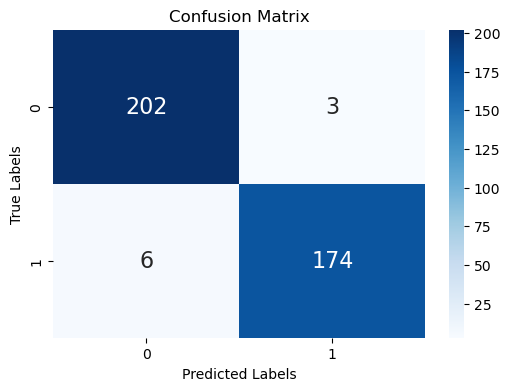

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report

In [15]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       205
           1       0.98      0.97      0.97       180

    accuracy                           0.98       385
   macro avg       0.98      0.98      0.98       385
weighted avg       0.98      0.98      0.98       385



# Detection on New Data

In [4]:
# Function to load and preprocess new data
def load_and_preprocess_new_data(folder_path):
    images = []
    original_filenames = []  # Store the original filenames

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path) and img_path.endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (224, 224))
            images.append(img)
            original_filenames.append(filename)  # Store the original filename

    return np.array(images), original_filenames

# Load the new data
new_data_folder = "test dataset"  # Replace with the path to your new data folder
new_data_images, original_filenames = load_and_preprocess_new_data(new_data_folder)

# Normalize pixel values
new_data_images = new_data_images / 255.0

# Load the CNN model
cnn_model = load_model("breast_cancer_cnn_model1.h5")

# Use CNN for feature extraction on new data
new_data_features = cnn_model.predict(new_data_images)

# Load the SVM model
svm_model = joblib.load("breast_cancer_svm_modelNEW1.pkl")

# Use SVM for classification on new data
new_data_predictions = svm_model.predict(new_data_features)

# Map numeric labels to class names
class_names = {0: "healthy", 1: "unhealthy"}
predicted_labels = [class_names[label] for label in new_data_predictions]

# Create a table with original filenames
output_table = {'Original Filename': original_filenames, 'Predicted Label': predicted_labels}
output_df = pd.DataFrame(output_table)

# Display the output table
print(output_df)

8/8 [==============================] - 2s 255ms/step
       Original Filename Predicted Label
0     PAC_00_DN0-dir.png       unhealthy
1     PAC_00_DN1-dir.png       unhealthy
2    PAC_00_DN10-dir.png       unhealthy
3    PAC_00_DN11-dir.png       unhealthy
4    PAC_00_DN12-dir.png       unhealthy
..                   ...             ...
251   PAC_16_DN7-esq.png         healthy
252   PAC_16_DN8-dir.png         healthy
253   PAC_16_DN8-esq.png         healthy
254   PAC_16_DN9-dir.png         healthy
255   PAC_16_DN9-esq.png         healthy

[256 rows x 2 columns]


In [5]:
# Function to load and preprocess new data
def load_and_preprocess_new_data(folder_path):
    images = []
    original_filenames = []  # Store the original filenames

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path) and img_path.endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (224, 224))
            images.append(img)
            original_filenames.append(filename)  # Store the original filename

    return np.array(images), original_filenames

# Load the new data
new_data_folder = "test dataset1"  # Replace with the path to your new data folder
new_data_images, original_filenames = load_and_preprocess_new_data(new_data_folder)

# Normalize pixel values
new_data_images = new_data_images / 255.0

# Load the CNN model
cnn_model = load_model("breast_cancer_cnn_model1.h5")

# Use CNN for feature extraction on new data
new_data_features = cnn_model.predict(new_data_images)

# Load the SVM model
svm_model = joblib.load("breast_cancer_svm_modelNEW1.pkl")

# Use SVM for classification on new data
new_data_predictions = svm_model.predict(new_data_features)

# Map numeric labels to class names
class_names = {0: "healthy", 1: "unhealthy"}
predicted_labels = [class_names[label] for label in new_data_predictions]

# Create a table with original filenames
output_table = {'Original Filename': original_filenames, 'Predicted Label': predicted_labels}
output_df = pd.DataFrame(output_table)

# Display the output table
print(output_df)

2/2 [==============================] - 1s 142ms/step
     Original Filename Predicted Label
0      healthy (1).png         healthy
1     healthy (10).png         healthy
2     healthy (11).png         healthy
3     healthy (12).png         healthy
4     healthy (13).png         healthy
5     healthy (14).png         healthy
6     healthy (15).png         healthy
7     healthy (16).png         healthy
8     healthy (17).png         healthy
9     healthy (18).png         healthy
10    healthy (19).png         healthy
11     healthy (2).png         healthy
12    healthy (20).png         healthy
13    healthy (21).png         healthy
14    healthy (22).png         healthy
15    healthy (23).png         healthy
16    healthy (24).png         healthy
17    healthy (25).png         healthy
18    healthy (26).png         healthy
19    healthy (27).png         healthy
20    healthy (28).png         healthy
21    healthy (29).png       unhealthy
22     healthy (3).png         healthy
23    healt